# Automate API Data

In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [12]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

In [13]:
type(data)

dict

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#This normalizes the data and makes it all pretty in a dataframe


In [15]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-15-7ca7f5bd7fbb>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10221,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.938090e+07,1.938090e+07,False,NaN,1,NaN,NaN,None,2023-05-22T23:17:00.000Z,26856.045106,1.104964e+10,28.0585,-0.151832,0.217127,-1.675893,-3.479892,-5.699048,10.100310,5.204943e+11,46.2978,5.639769e+11,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
1,1027,Ethereum,ETH,ethereum,6933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202694e+08,1.202694e+08,True,NaN,2,NaN,NaN,None,2023-05-22T23:17:00.000Z,1818.818078,4.543224e+09,35.0657,-0.170774,0.583590,-0.220126,-3.137205,-0.248489,9.992936,2.187482e+11,19.4576,2.187482e+11,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
2,825,Tether,USDT,tether,53878,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.291908e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-22T23:17:00.000Z,1.000419,1.721129e+10,27.5513,0.032982,0.014851,-0.007341,0.022666,-0.147414,0.025423,8.295380e+10,7.3787,8.612669e+10,None,2023-05-22T23:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-22 23:27:11.893994
3,1839,BNB,BNB,bnb,1387,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558582e+08,1.558582e+08,False,NaN,4,NaN,NaN,None,2023-05-22T23:17:00.000Z,309.392641,3.554114e+08,16.8482,-0.211078,0.795130,-1.539333,-6.843480,-6.231465,-0.548911,4.822137e+10,4.2893,4.822137e+10,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
4,3408,USD Coin,USDC,usd-coin,12582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.942094e+10,2.942094e+10,False,NaN,5,NaN,NaN,None,2023-05-22T23:17:00.000Z,0.999954,2.593088e+09,47.1678,-0.000784,-0.000571,-0.011960,-0.017369,0.007024,-0.006489,2.941958e+10,2.6169,2.941958e+10,None,2023-05-22T23:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-22 23:27:11.893994
5,52,XRP,XRP,xrp,951,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.187315e+10,9.998893e+10,False,NaN,6,NaN,NaN,None,2023-05-22T23:17:00.000Z,0.462072,9.032442e+08,69.1115,0.293271,0.528325,7.760101,-2.128501,3.536206,18.083352,2.396911e+10,2.1320,4.620716e+10,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
6,2010,Cardano,ADA,cardano,790,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.486311e+10,3.581044e+10,False,NaN,7,NaN,NaN,None,2023-05-22T23:17:00.000Z,0.367913,1.774606e+08,52.3761,-0.411999,1.826246,-0.279385,-7.171318,-1.102102,-5.933035,1.282660e+10,1.1409,1.655609e+10,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
7,74,Dogecoin,DOGE,dogecoin,711,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.394561e+11,1.394561e+11,True,NaN,8,NaN,NaN,None,2023-05-22T23:17:00.000Z,0.073064,2.101190e+08,47.7919,-0.055057,1.016954,1.019855,-9.166677,-5.526602,-14.434515,1.018924e+10,0.9063,1.018924e+10,None,2023-05-22T23:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:27:11.893994
8,3890,Polygon,MATIC,polygon,709,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e

In [22]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df.to_csv

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'API.csv')


In [23]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: ignored

In [26]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10221,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.938090e+07,1.938090e+07,False,NaN,1,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,26862.124528,1.105825e+10,27.8827,-0.096109,0.283558,-1.538560,-3.405530,-5.437025,10.242323,5.206121e+11,46.3202,5.641046e+11,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
1,1,1027,Ethereum,ETH,ethereum,6933,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202694e+08,1.202694e+08,True,NaN,2,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1818.543805,4.542779e+09,34.5224,-0.118957,0.655207,-0.175288,-2.978738,-0.045727,10.039635,2.187152e+11,19.4596,2.187152e+11,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
2,2,825,Tether,USDT,tether,53878,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.291908e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.000240,1.721939e+10,27.3256,0.014066,0.005399,0.000841,0.004725,-0.109403,0.009163,8.293895e+10,7.3793,8.611127e+10,NaN,2023-05-22T23:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-22 23:33:38.903284
3,3,1839,BNB,BNB,bnb,1387,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558582e+08,1.558582e+08,False,NaN,4,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,309.308027,3.553439e+08,16.5540,-0.144922,0.798259,-1.531313,-6.878901,-6.188774,-0.470070,4.820818e+10,4.2892,4.820818e+10,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
4,4,3408,USD Coin,USDC,usd-coin,12582,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.942094e+10,2.942094e+10,False,NaN,5,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.000030,2.590226e+09,46.4724,0.006447,0.017303,0.003913,-0.006221,0.067586,0.009729,2.942181e+10,2.6177,2.942181e+10,NaN,2023-05-22T23:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-22 23:33:38.903284
5,5,52,XRP,XRP,xrp,951,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.187315e+10,9.998893e+10,False,NaN,6,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.461884,9.048446e+08,69.5424,0.197179,0.691782,7.754599,-2.239651,3.710048,18.133835,2.395936e+10,2.1317,4.618837e+10,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
6,6,2010,Cardano,ADA,cardano,790,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.486311e+10,3.581044e+10,False,NaN,7,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.367773,1.776621e+08,52.3702,-0.387130,1.872936,-0.272659,-7.104909,-1.249131,-5.951483,1.282171e+10,1.1407,1.654979e+10,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
7,7,74,Dogecoin,DOGE,dogecoin,711,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.394561e+11,1.394561e+11,True,NaN,8,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.073025,2.101484e+08,47.9836,-0.051110,1.061302,1.016728,-9.131679,-5.690064,-14.303109,1.018377e+10,0.9061,1.018377e+10,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
8,8,3890,Polygon,MATIC,polygon,709,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",

# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10221,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19380900.00000,19380900.00000,False,NaN,1,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,26862.12453,11058254668.72815,27.88270,-0.09611,0.28356,-1.53856,-3.40553,-5.43702,10.24232,520612149269.25934,46.32020,564104615092.92004,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
1,1,1027,Ethereum,ETH,ethereum,6933,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120269409.46943,120269409.46943,True,NaN,2,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1818.54380,4542779416.22881,34.52240,-0.11896,0.65521,-0.17529,-2.97874,-0.04573,10.03964,218715189502.54510,19.45960,218715189502.54999,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
2,2,825,Tether,USDT,tether,53878,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82919078535.20427,86090638895.05328,True,NaN,3,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.00024,17219385542.31306,27.32560,0.01407,0.00540,0.00084,0.00472,-0.10940,0.00916,82938947675.13895,7.37930,86111268006.97000,NaN,2023-05-22T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-22 23:33:38.903284
3,3,1839,BNB,BNB,bnb,1387,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155858168.20289,155858168.20289,False,NaN,4,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,309.30803,355343864.36980,16.55400,-0.14492,0.79826,-1.53131,-6.87890,-6.18877,-0.47007,48208182450.36217,4.28920,48208182450.36000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
4,4,3408,USD Coin,USDC,usd-coin,12582,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29420939250.75391,29420939250.75391,False,NaN,5,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.00003,2590226306.60551,46.47240,0.00645,0.01730,0.00391,-0.00622,0.06759,0.00973,29421814986.77433,2.61770,29421814986.77000,NaN,2023-05-22T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-22 23:33:38.903284
5,5,52,XRP,XRP,xrp,951,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51873152538.00000,99988934739.00000,False,NaN,6,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.46188,904844608.06301,69.54240,0.19718,0.69178,7.75460,-2.23965,3.71005,18.13383,23959363175.50993,2.13170,46188369133.64000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
6,6,2010,Cardano,ADA,cardano,790,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34863111584.60900,35810438256.57800,False,NaN,7,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.36777,177662090.22555,52.37020,-0.38713,1.87294,-0.27266,-7.10491,-1.24913,-5.95148,12821713034.97151,1.14070,16549787450.08000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
7,7,74,Dogecoin,DOGE,dogecoin,711,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139456066383.70523,139456066383.70523,True,NaN,8,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.07302,210148362.51199,47.98360,-0.05111,1.06130,1.01673,-9.13168,-5.69006,-14.30311,10183772604.95264,0.90610,10183772604.95000,NaN,2023-05-22T23:31:00.0

# Now let's look at the coin trends over time

In [29]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07711,0.28563,-1.52875,-3.46555,-5.47034,10.18525
Ethereum,-0.09049,0.63455,-0.15185,-3.03838,-0.07489,9.97252
Tether,0.00780,-0.00446,-0.00863,0.00140,-0.10556,0.00316
BNB,-0.11884,0.80387,-1.51589,-6.89852,-6.20394,-0.54179
USD Coin,0.00981,0.00432,-0.00339,-0.01343,0.07841,-0.00230
XRP,0.20401,0.69443,7.77385,-2.26868,3.65287,18.05934
Cardano,-0.35359,1.87307,-0.25219,-7.14567,-1.27512,-5.99969
Dogecoin,-0.04808,1.07835,1.03715,-9.15701,-5.71818,-14.36881
Polygon,-0.11850,1.64090,0.98126,-14.94563,-23.12333,-36.80534


In [30]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.07711
             quote.USD.percent_change_24h     0.28563
             quote.USD.percent_change_7d     -1.52875
             quote.USD.percent_change_30d    -3.46555
             quote.USD.percent_change_60d    -5.47034
             quote.USD.percent_change_90d    10.18525
Ethereum     quote.USD.percent_change_1h     -0.09049
             quote.USD.percent_change_24h     0.63455
             quote.USD.percent_change_7d     -0.15185
             quote.USD.percent_change_30d    -3.03838
             quote.USD.percent_change_60d    -0.07489
             quote.USD.percent_change_90d     9.97252
Tether       quote.USD.percent_change_1h      0.00780
             quote.USD.percent_change_24h    -0.00446
             quote.USD.percent_change_7d     -0.00863
             quote.USD.percent_change_30d     0.00140
             quote.USD.percent_change_60d    -0.10556
             quote.USD.percent_change_90

In [31]:
type(df4)

pandas.core.series.Series

In [32]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.07711
            quote.USD.percent_change_24h   0.28563
            quote.USD.percent_change_7d   -1.52875
            quote.USD.percent_change_30d  -3.46555
            quote.USD.percent_change_60d  -5.47034
            quote.USD.percent_change_90d  10.18525
Ethereum    quote.USD.percent_change_1h   -0.09049
            quote.USD.percent_change_24h   0.63455
            quote.USD.percent_change_7d   -0.15185
            quote.USD.percent_change_30d  -3.03838
            quote.USD.percent_change_60d  -0.07489
            quote.USD.percent_change_90d   9.97252
Tether      quote.USD.percent_change_1h    0.00780
            quote.USD.percent_change_24h  -0.00446
            quote.USD.percent_change_7d   -0.00863
            quote.USD.percent_change_30d   0.00140
            quote.USD.percent_change_60d  -0.10556
            quote.USD.percent_change_90d   0.00316
BNB         quote.USD.percent_change_1h   -0.11884
            quote.USD.percent_change_24h   0.80387
            quote.USD.percent_change_7d   -1.51589
            quote.USD.percent_change_30d  -6.89852
            quote.USD.percent_change_60d  -6.20394
            quote.USD.percent_change_90d  -0.54179
USD Coin    quote.USD.percent_change_1h    0.00981
            quote.USD.percent_change_24h   0.00432
            quote.USD.percent_change_7d   -0.00339
            quote.USD.percent_change_30d  -0.01343
            quote.USD.percent_change_60d   0.07841
            quote.USD.percent_change_90d  -0.00230
XRP         quote.USD.percent_change_1h    0.20401
            quote.USD.percent_change_24h   0.69443
            quote.USD.percent_change_7d    7.77385
            quote.USD.percent_change_30d  -2.26868
            quote.USD.percent_change_60d   3.65287
            quote.USD.percent_change_90d  18.05934
Cardano     quote.USD.percent_change_1h   -0.35359
            quote.USD.percent_change_24h   1.87307
            quote.USD.percent_change_7d   -0.25219
            quote.USD.percent_change_30d  -7.14567
            quote.USD.percent_change_60d  -1.27512
            quote.USD.percent_change_90d  -5.99969
Dogecoin    quote.USD.percent_change_1h   -0.04808
            quote.USD.percent_change_24h   1.07835
            quote.USD.percent_change_7d    1.03715
            quote.USD.percent_change_30d  -9.15701
            quote.USD.percent_change_60d  -5.71818
            quote.USD.percent_change_90d -14.36881
Polygon     quote.USD.percent_change_1h   -0.11850
            quote.USD.percent_change_24h   1.64090
            quote.USD.percent_change_7d    0.98126
            quote.USD.percent_change_30d -14.94563
            quote.USD.percent_change_60d -23.12333
            quote.USD.percent_change_90d -36.80534
Solana      quote.USD.percent_change_1h   -0.43529
            quote.USD.percent_change_24h  -0.48074
            quote.USD.percent_change_7d   -7.12517
            quote.USD.percent_change_30d -10.33913
            quote.USD.percent_change_60d -11.83894
            quote.USD.percent_change_90d -21.00090
TRON        quote.USD.percent_change_1h   -0.35017
            quote.USD.percent_change_24h   3.83612
            quote.USD.percent_change_7d   10.96427
            quote.USD.percent_change_30d  18.34312
            quote.USD.percent_change_60d  19.50831
            quote.USD.percent_change_90d  12.68575
Litecoin    quote.USD.percent_change_1h   -0.04925
            quote.USD.percent_change_24h  -1.63201
            quote.USD.percent_change_7d    3.91933
            quote.USD.percent_change_30d   4.44157
            quote.USD.percent_change_60d  -2.84004
            quote.USD.percent_change_90d  -2.61303
Polkadot    quote.USD.percent_change_1h   -0.02038
            quote.USD.percent_change_24h   0.61545
            quote.USD.percent_change_7d   -0.38496
            quote.USD.percent_change_30d -10.71777
            quote.USD.percent_change_60d -15.87912
            quo

In [33]:
df5.count()

values    90
dtype: int64

In [34]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.07711
1,0.28563
2,-1.52875
3,-3.46555
4,-5.47034
5,10.18525
6,-0.09049
7,0.63455
8,-0.15185
9,-3.03838


# Change the column name

In [39]:
df7 = df6.rename(columns={'values': 'percent_change'})
df7

,percent_change
0,-0.07711
1,0.28563
2,-1.52875
3,-3.46555
4,-5.47034
5,10.18525
6,-0.09049
7,0.63455
8,-0.15185
9,-3.03838


In [40]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,percent_change
0,-0.07711
1,0.28563
2,-1.52875
3,-3.46555
4,-5.47034
5,10.18525
6,-0.09049
7,0.63455
8,-0.15185
9,-3.03838


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

ValueError: ignored

# we are going to create a dataframe with the columns we want

In [43]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26862.12453,2023-05-22 23:33:38.903284
15,Bitcoin,26858.36814,2023-05-22 23:34:39.321888
30,Bitcoin,26862.10254,2023-05-22 23:35:39.638025
45,Bitcoin,26867.67977,2023-05-22 23:36:42.855730


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

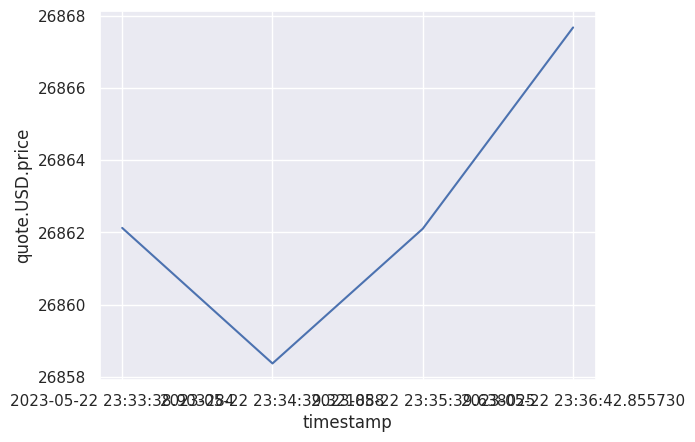

In [44]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)